## Transformations of  Qubits

Introduction.

### The Qubit

The qubit is the idealization of a two-state quantum mechanical system. The two measurable states are expressed

\begin{equation}\label{eq:01}
  |0\rangle \equiv \begin{bmatrix} 1 \\ 0 \end{bmatrix} \and
  |1\rangle \equiv \begin{bmatrix} 0 \\ 1 \end{bmatrix} 
\end{equation}

while, in general the system is in some superposition of these states, namely

\begin{equation}\label{eq:sup}
  \psi = \alpha|0\rangle + \beta|1\rangle
\end{equation}

where $\alpha$ and $\beta$ are complex **probability amplitudes**. The square of the respective magnitude is interpreted as the probability of finding $\psi$ in that state. That is, $|\alpha|^2$ is the probability of $\psi$ taking the form $|0\rangle$ and 
$|\beta|^2$ is the probability of $\psi$ taking the form $|1\rangle$. As these are the only two possibilities it follows that $|\alpha|^2+ |\beta|^2=1$ and so $\psi$ has but three real degrees of freedom, for example

\begin{equation}\label{eq:ab3}
  \alpha = \exp(i\delta)\cos(\theta/2) \and \beta = \exp(i(\delta+\phi))\sin(\theta/2)
\end{equation}

But as this common phase shift in $\delta$ has no physical significance we may write

\begin{equation}\label{eq:ab2}
  \alpha = \cos(\theta/2) \and \beta = \exp(i\phi)\sin(\theta/2)
\end{equation}

and so represent $\psi$ on the Bloch sphere of Figure \ref{fig:bloch}.

<IPython.core.display.Javascript object>


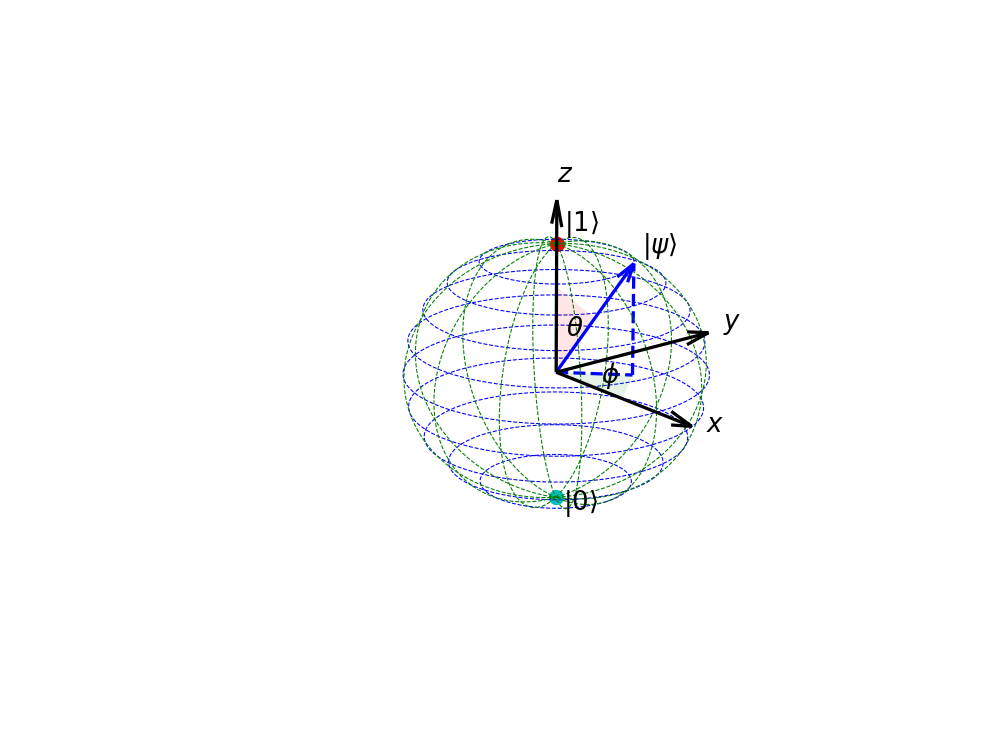

In [3]:
# The Bloch Sphere

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

theta = np.pi/6
phi = np.pi/4
r = 3/2
x = r*np.sin(theta)*np.cos(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(theta)

ax.quiver(0,0,0,x,y,z, colors='b', arrow_length_ratio=.15)
ax.text3D(1.1*x, 1.1*y, 1.1*z, '$|\\psi\\rangle$', fontsize=12)
ax.plot(0,0,r,'ro')
ax.text3D(0.05, 0.05, 1.1*r, '$|1\\rangle$', fontsize=12)
ax.plot(0,0,-r,'co')
ax.text3D(0.05, 0.05, -1.1*r, '$|0\\rangle$', fontsize=12)

ex = np.array([2,0,0])
ey = np.array([0,2,0])
ez = np.array([0,0,2])
ax.quiver([0,0,0],[0,0,0],[0,0,0],ex,ey,ez, colors='k', arrow_length_ratio=.15)

tex = 1.1*ex
ax.text3D(tex[0], tex[1], tex[2], '$x$', fontsize=12)
tey = 1.1*ey
ax.text3D(tey[0], tey[1], tey[2], '$y$', fontsize=12)
tez = 1.1*ez
ax.text3D(tez[0], tez[1], tez[2], '$z$', fontsize=12)

ax.plot3D([0, x], [0, y], [0,0], 'b--')
#ax.text3D(1.1*x, 1.1*y, 0, '$a^{\\flat}$', fontsize=12)
ax.plot3D([x, x], [y, y], [0,z], 'b--')

ax.text3D(x/8, y/8, z/3, '$\\theta$', fontsize=12)
ax.text3D(x, y/4, 0, '$\phi$', fontsize=12)

# paint the theta sector
Bx = [0, x/2, ez[0]/2]   
By = [0, y/2, ez[1]/2]    
Bz = [0, z/2, ez[2]/2]    
verts = [list(zip(Bx, By, Bz))]
ax.add_collection3d(Poly3DCollection(verts, facecolor = 'r', alpha = 0.1))

# paint the phi sector
Bx = [0, x, ex[0]/2]   
By = [0, y, ex[1]/2]    
Bz = [0, 0, ex[2]/2]    
verts = [list(zip(Bx, By, Bz))]
ax.add_collection3d(Poly3DCollection(verts, facecolor = 'g', alpha = 0.1))

# plot lines of latitude
phi = np.linspace(0, 2*np.pi, 100)
for lat in range(-60,75,15):
    theta = (np.pi/180.0)*(90 - lat)*np.ones(phi.size)
    u = (3/2)*np.sin(theta)*np.cos(phi)
    v = (3/2)*np.sin(theta)*np.sin(phi)
    w = (3/2)*np.cos(theta)
    ax.plot(u, v, w, 'b--', linewidth=0.5)
    
# plot lines of longitude
eps = 1e-6
theta = np.linspace(eps, np.pi-eps, 100)
for long in range(-180,180,30):
    phi = -(np.pi/180.0)*(180 - long)*np.ones(theta.size)
    u = (3/2)*np.sin(theta)*np.cos(phi)
    v = (3/2)*np.sin(theta)*np.sin(phi)
    w = (3/2)*np.cos(theta)
    ax.plot(u, v, w, 'g--', linewidth=0.5)
    
ax.set_xlim(-2,1.5)
ax.set_ylim(-2,1.5)
ax.set_zlim(-1.5,1.5)

ax.axis('off')
plt.show()


\begin{myfig}\label{fig:bloch} The Bloch sphere. \end{myfig}

### Quantum Gates

Linear transformations of $\psi$ will just walk us around the Bloch. We follow Ekert and start with the concrete "circuit" of Figure \ref{fig:HPH}. We read the flow from left to right from the basis states to the basis states. Starting from state $|1\rangle$ we see at its first black dot that it may transition to state $|0\rangle$ with probability amplitude $s$ or it may stay its course with probability amplitude $-s$. Assuming the latter it then encounters a red "phase gate" that multiplies its probability amplitude by $\exp(i\phi_2)$. If, at the next black branch point it follows the upper track we find that the probability amplitude associated with state $|1\rangle$ remaining in this state via the upper track is $s^2\exp(i\phi_2)$. In like fashion, the probability amplitude associated with state $|1\rangle$ remaining in this state via the lower track is $s^2\exp(i\phi_1)$ and as such the total probability amplitude that $|1\rangle$ transitions to $|1\rangle$ is 

\begin{equation}\label{eq:1persist}
\eqalign{ s^2\exp(i\phi_2) + s^2\exp(i\phi_1) 
  &= s^2\exp(i(\phi_1+\phi_2)/2)(\exp(i(\phi_1-\phi_2)/2)+\exp(-i(\phi_1-\phi_2)/2)) \cr
  &= \exp(i(\phi_1+\phi_2)/2)\cos(\phi/2) \where \phi\equiv \phi_1-\phi_2 \cr}
\end{equation}


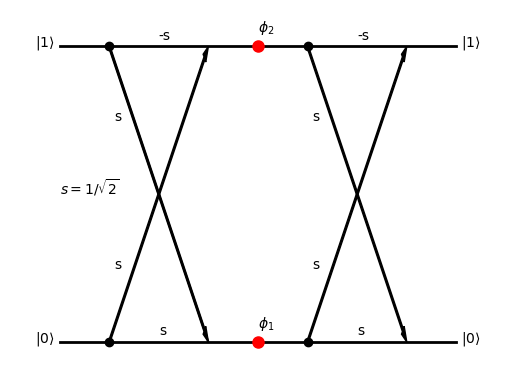

In [50]:
# first quantum circuit
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot([0,8],[2,2],'k',linewidth=2)
plt.plot([0,8],[0,0],'k',linewidth=2)
plt.arrow(1,0,2,2,width=0.025,color='k',length_includes_head = True)
plt.arrow(1,2,2,-2,width=0.025,color='k',length_includes_head = True)

plt.plot([1,3],[2,0],'k')
plt.arrow(5,0,2,2,width=0.025,color='k',length_includes_head = True)
plt.arrow(5,2,2,-2,width=0.025,color='k',length_includes_head = True)

plt.text(2,0.05,'s')
plt.text(2,2.05,'-s')
plt.text(1.1,1/2,'s')
plt.text(1.1,3/2,'s')

plt.text(4+2,0.05,'s')
plt.text(4+2,2.05,'-s')
plt.text(4+1.1,1/2,'s')
plt.text(4+1.1,3/2,'s')

plt.plot(1,0,'ko')
plt.plot(1,2,'ko')
plt.plot(5,0,'ko')
plt.plot(5,2,'ko')

plt.plot(4,0,'ro',markersize=8)
plt.plot(4,2,'ro',markersize=8)

plt.text(4,2.1,'$\\phi_2$')
plt.text(4,0.1,'$\\phi_1$')

plt.text(-.5,0,'$|0\\rangle$')
plt.text(8.1,0,'$|0\\rangle$')
plt.text(-.5,2,'$|1\\rangle$')
plt.text(8.1,2,'$|1\\rangle$')

plt.text(0,1,'$s=1/\\sqrt{2}$')

plt.axis([-1,9,-0.25,2.25])
plt.axis('off');

\begin{myfig}\label{fig:HPH} A quantum circuit of 3 gates. \end{myfig}

We can compute the three other transition probability amplitudes more readily by writing the first and second gates as

\begin{equation}\label{eq:HPp}
  H = \begin{bmatrix} s & -s \\ s & s \end{bmatrix}  \and 
  P_\phi = \begin{bmatrix} \exp(i\phi_1) & 0 \\ 0 & \exp(i\phi_1) \end{bmatrix}
\end{equation}

\begin{exercise}\label{ex:HPH}
Show that

\begin{equation}\label{eq:HPp2}
  HP_\phi H = \exp(i(\phi_1+\phi_2)/2)
      \begin{bmatrix} \cos(\phi/2) & -i\sin(\phi/2) \\ -i\sin(\phi/2) & \cos(\phi/2) \end{bmatrix}
      \where \phi\equiv \phi_1-\phi_2
\end{equation}

as above.
\end{exercise}

